# Presentation and Visualization Storytelling: Adults Dataset


To begin our analysis of the "Adults" dataset, we will load the data from the University of California, Irvine's website: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import warnings
from scipy.stats import pointbiserialr
import numpy as np
from scipy.stats import pointbiserialr
from scipy.stats.contingency import association
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load the dataset
url = "/content/drive/MyDrive/Visualization/adult.data"
column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
    "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
    "hours_per_week", "native_country", "income"
]
df = pd.read_csv(url, names=column_names, sep=",\s*", engine="python",na_values='?')

df.head(5)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df=df.drop(['relationship','race','capital_gain','capital_loss','fnlwgt'],axis=1)

In [6]:
df.head(5)

,age,workclass,education,education_num,marital_status,occupation,sex,hours_per_week,native_country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Female,40,Cuba,<=50K


In [7]:
def simplify_marital_status(status):
  if 'Married' in status:
    return 'Married'
  elif 'Never-married' == status:
    return 'Never Married'
  elif 'Separated' == status:
    return 'Divorced'
  else:
    return status

In [8]:
def simplify_education(edu, edu_num):
    if 'Preschool' in edu:
        return 'Preschool', 1
    elif '1st-4th' in edu or '5th-6th' in edu:
        return 'Elementary School', 2
    elif '7th-8th' in edu:
        return 'Middle School', 3
    elif '9th' in edu or '10th' in edu:
        return 'High School Dropout', 4
    elif '12th' in edu or 'HS-grad' in edu or '11th' in edu:
        return 'High School Graduate', 5
    elif 'Assoc-acdm' in edu or 'Assoc-voc' in edu or 'Some-college' in edu:
        return 'Some College', 6
    elif 'Bachelors' in edu:
        return 'Bachelors', 7
    elif 'Masters' in edu:
        return 'Masters', 8
    elif 'Doctorate' in edu or 'Prof-school' in edu:
        return 'Doctorate', 9
    else:
        return edu, edu_num

In [9]:
df['marital_status'] = df['marital_status'].apply(simplify_marital_status)
df['education'], df['education_num'] = zip(*df.apply(lambda row: simplify_education(row['education'], row['education_num']), axis=1))

In [10]:
unique_educations_ordered = df[['education', 'education_num']].drop_duplicates().sort_values('education_num')
print(unique_educations_ordered['education'].values)

['Preschool' 'Elementary School' 'Middle School' 'High School Dropout'
 'High School Graduate' 'Some College' 'Bachelors' 'Masters' 'Doctorate']


In [11]:
iso_mapping = {
    'United-States': 'USA',
    'Cuba': 'CUB',
    'Jamaica': 'JAM',
    'India': 'IND',
    'Mexico': 'MEX',
    'South': 'KOR',
    'Puerto-Rico': 'PRI',
    'Honduras': 'HND',
    'England': 'GBR',
    'Canada': 'CAN',
    'Germany': 'DEU',
    'Iran': 'IRN',
    'Philippines': 'PHL',
    'Italy': 'ITA',
    'Poland': 'POL',
    'Columbia': 'COL',
    'Cambodia': 'KHM',
    'Thailand': 'THA',
    'Ecuador': 'ECU',
    'Laos': 'LAO',
    'Taiwan': 'TWN',
    'Haiti': 'HTI',
    'Portugal': 'PRT',
    'Dominican-Republic': 'DOM',
    'El-Salvador': 'SLV',
    'France': 'FRA',
    'Guatemala': 'GTM',
    'China': 'CHN',
    'Japan': 'JPN',
    'Yugoslavia': 'SRB',  # Replace 'Yugoslavia' with 'SRB' or the appropriate ISO code for Serbia
    'Peru': 'PER',
    'Outlying-US(Guam-USVI-etc)': 'USA',
    'Scotland': 'GBR',
    'Trinadad&Tobago': 'TTO',
    'Greece': 'GRC',
    'Nicaragua': 'NIC',
    'Vietnam': 'VNM',
    'Hong': 'HKG',
    'Ireland': 'IRL',
    'Hungary': 'HUN',
    'Holand-Netherlands': 'NLD'
}


In [12]:
df['native_country'] = df['native_country'].map(iso_mapping)

In [13]:
df['native_country'].unique()

array(['USA', 'CUB', 'JAM', 'IND', nan, 'MEX', 'KOR', 'PRI', 'HND', 'GBR',
       'CAN', 'DEU', 'IRN', 'PHL', 'ITA', 'POL', 'COL', 'KHM', 'THA',
       'ECU', 'LAO', 'TWN', 'HTI', 'PRT', 'DOM', 'SLV', 'FRA', 'GTM',
       'CHN', 'JPN', 'SRB', 'PER', 'TTO', 'GRC', 'NIC', 'VNM', 'HKG',
       'IRL', 'HUN', 'NLD'], dtype=object)

# Plots

## Education Distribution by Gender

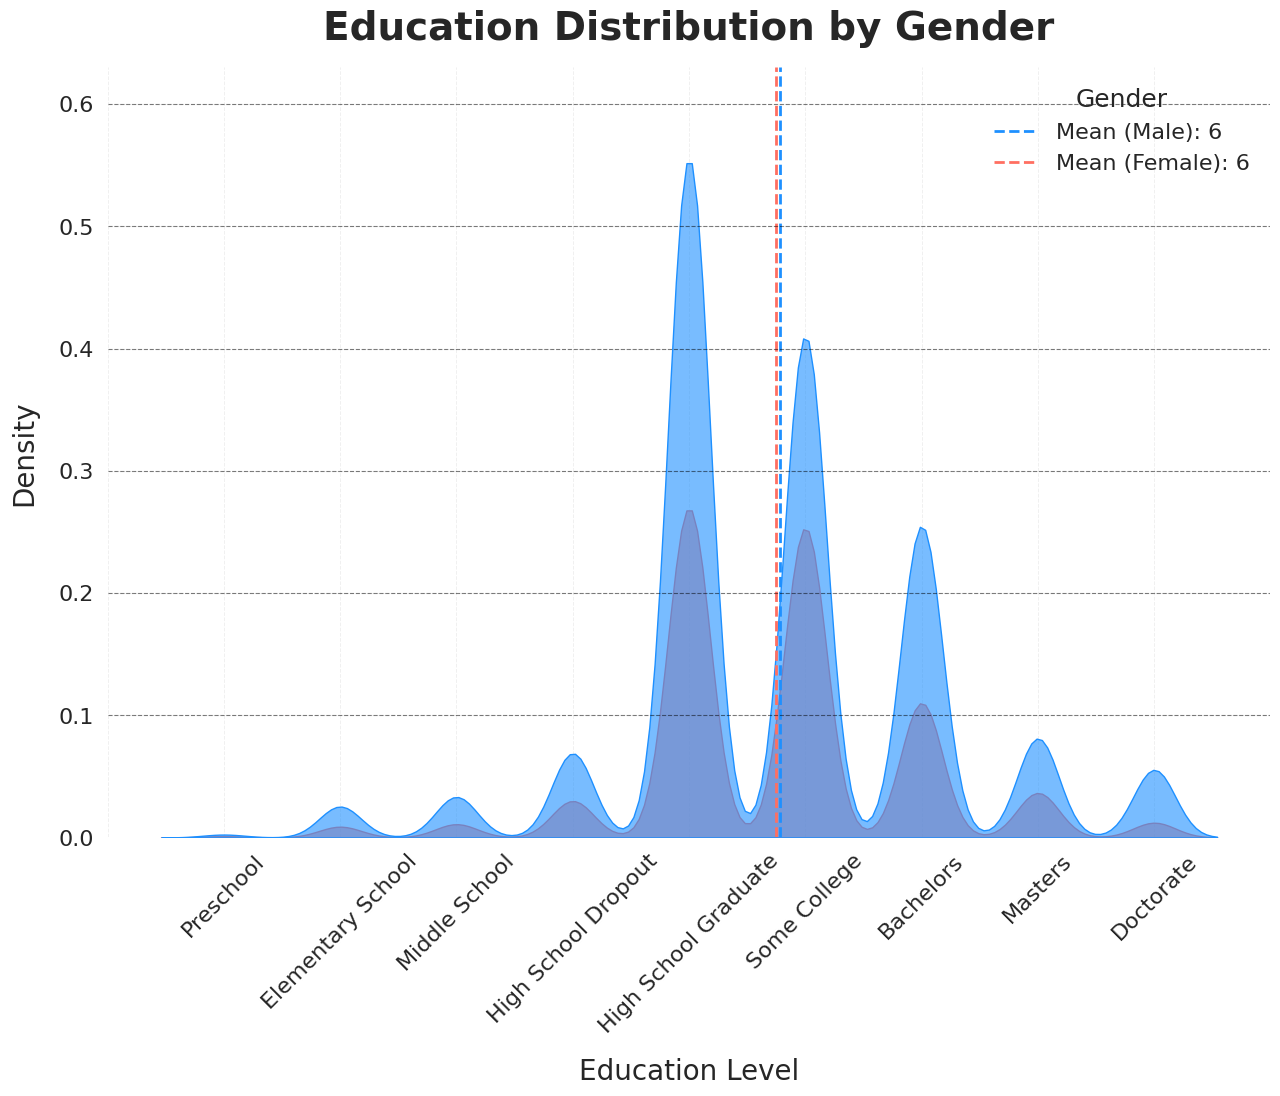

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set the style for the plots
sns.set(style="whitegrid")

# Custom colors for better contrast
female_color = '#FF6F61'
male_color = '#1E90FF'

# Create a KDE plot with a smooth fill and preserve the common normalization
plt.figure(figsize=(15, 10))
bp = sns.kdeplot(x='education_num', hue='sex', data=df, fill=True, common_norm=True, legend=True,
                 palette={'Male': male_color, 'Female': female_color}, alpha=0.6)

# Keep the original mean lines but enhance styling
mean_values = df.groupby('sex')['education_num'].mean()
plt.axvline(x=mean_values['Male'], color=male_color, linestyle='--', linewidth=2, label=f'Mean (Male): {round(mean_values["Male"])}')
plt.axvline(x=mean_values['Female'], color=female_color, linestyle='--', linewidth=2, label=f'Mean (Female): {round(mean_values["Female"])}')

# Customize the plot
plt.title('Education Distribution by Gender', fontsize=28, fontweight='bold', pad=20)
plt.xlabel('Education Level', fontsize=20, labelpad=15)
plt.ylabel('Density', fontsize=20, labelpad=15)

# Adjust x-ticks to match education levels
xlabels = ['', 'Preschool', 'Elementary School', 'Middle School', 'High School Dropout', 'High School Graduate',
           'Some College', 'Bachelors', 'Masters', 'Doctorate']
plt.xticks(np.arange(0, 10), xlabels, rotation=45, fontsize=16)

# Adjust y-ticks
plt.yticks(fontsize=16)

# Highlight important horizontal lines for density intervals
for edu_num in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]:
    plt.axhline(y=edu_num, color='black', linestyle='--', linewidth=0.8, alpha=0.5)

# Add a legend with customized style
plt.legend(title='Gender', title_fontsize=18, fontsize=16, loc='upper right', frameon=False)

# Box and grid settings
plt.box(False)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.3)

# Save the plot as a PNG image with a transparent background
plt.savefig('education_distribution_by_gender_updated_preserve.png', transparent=True, bbox_inches='tight')

# Show the plot
plt.show()


## Percentage of High-Income Individuals for Education Levels 9 and 13 Representing a Significant Share of the Population by Occupation and Gender. The analysis focuses on these two education levels to streamline the visualization and highlight key trends.

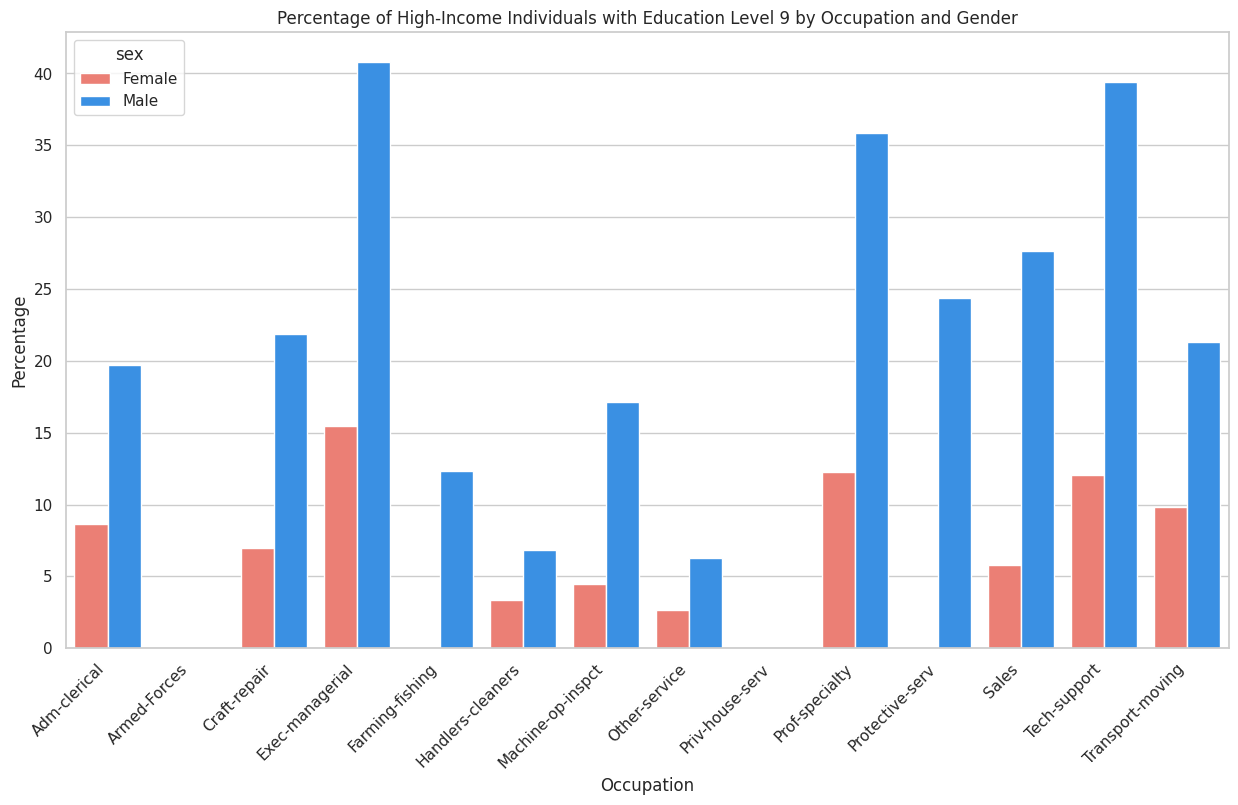

In [49]:
female_color = '#FF6F61'
male_color = '#1E90FF'

# Filter the dataset by the specified education level
df_filtered = df[df['education_num'] == 9]

# Calculate the percentage of high-income individuals by occupation and gender
percentage_high_income_filtered = (
    df_filtered[df_filtered['income'] == '>50K']
    .groupby(['occupation', 'sex']).size()
    / df_filtered.groupby(['occupation', 'sex']).size()
    * 100
)

# Convert the result into a DataFrame for easier manipulation
percentage_high_income_filtered = percentage_high_income_filtered.reset_index(name='percentage')

# Apply a clean style for the plot
sns.set(style="whitegrid")

# Create a bar chart to visualize the data
plt.figure(figsize=(15, 8))
sns.barplot(
    x='occupation',
    y='percentage',
    hue='sex',
    data=percentage_high_income_filtered,
    palette={'Male': male_color, 'Female': female_color}
)
plt.title(f'Percentage of High-Income Individuals with Education Level 9 by Occupation and Gender')
plt.xlabel('Occupation')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the plot
plt.show()


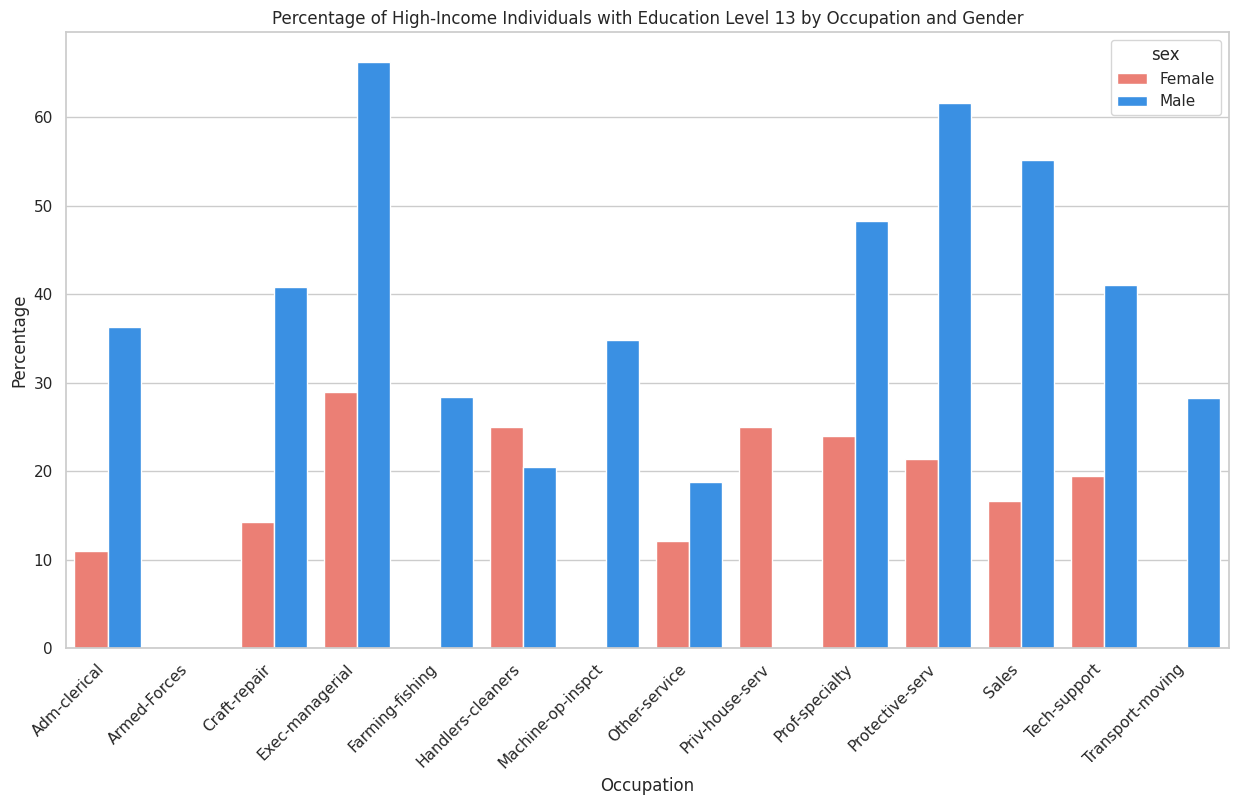

In [50]:
female_color = '#FF6F61'
male_color = '#1E90FF'

# Filter the dataset by the specified education level
df_filtered = df[df['education_num'] == 13]

# Calculate the percentage of high-income individuals by occupation and gender
percentage_high_income_filtered = (
    df_filtered[df_filtered['income'] == '>50K']
    .groupby(['occupation', 'sex']).size()
    / df_filtered.groupby(['occupation', 'sex']).size()
    * 100
)

# Convert the result into a DataFrame for easier manipulation
percentage_high_income_filtered = percentage_high_income_filtered.reset_index(name='percentage')

# Apply a clean style for the plot
sns.set(style="whitegrid")

# Create a bar chart to visualize the data
plt.figure(figsize=(15, 8))
sns.barplot(
    x='occupation',
    y='percentage',
    hue='sex',
    data=percentage_high_income_filtered,
    palette={'Male': male_color, 'Female': female_color}
)
plt.title(f'Percentage of High-Income Individuals with Education Level 13 by Occupation and Gender')
plt.xlabel('Occupation')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the plot
plt.show()


## Occupation

## Work hours per week by Gender

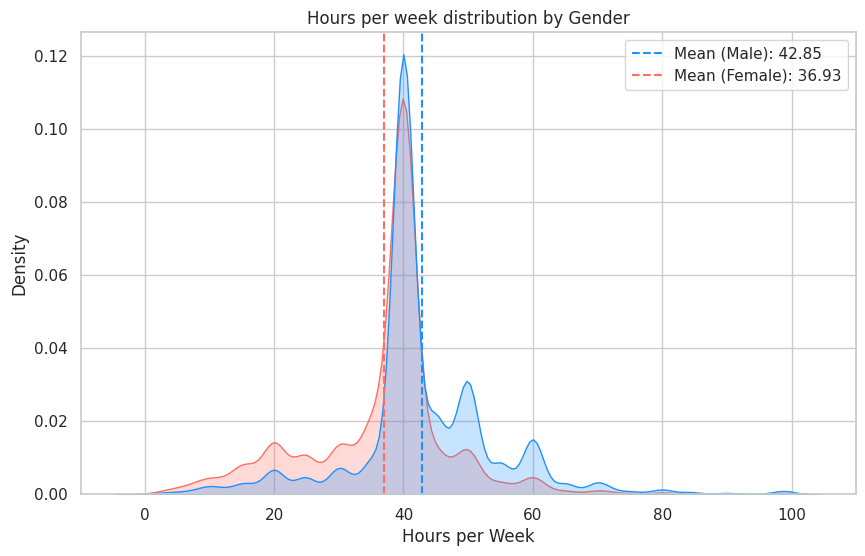

In [51]:
# Set the style for the plots
sns.set(style="whitegrid")

# Custom colors
female_color = '#FF6F61'
male_color = '#1E90FF'

# Create a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(x='hours_per_week', hue='sex', data=df, fill=True, common_norm=False, palette={'Male': male_color, 'Female': female_color})

# Calculate and plot the mean
mean_hours_per_week = df.groupby('sex')['hours_per_week'].mean()
plt.axvline(x=mean_hours_per_week['Male'], color=male_color, linestyle='--', label=f'Mean (Male): {mean_hours_per_week["Male"]:.2f}')
plt.axvline(x=mean_hours_per_week['Female'], color=female_color, linestyle='--', label=f'Mean (Female): {mean_hours_per_week["Female"]:.2f}')

# Customize the plot
plt.title('Hours per week distribution by Gender')
plt.xlabel('Hours per Week')
plt.ylabel('Density')
plt.legend()

# Save the plot as a PNG image with a transparent background
plt.savefig('hours_distribution_by_gender.png', transparent=True, bbox_inches='tight')

# Show the plot
plt.show()

These are depending on gender and marital status:

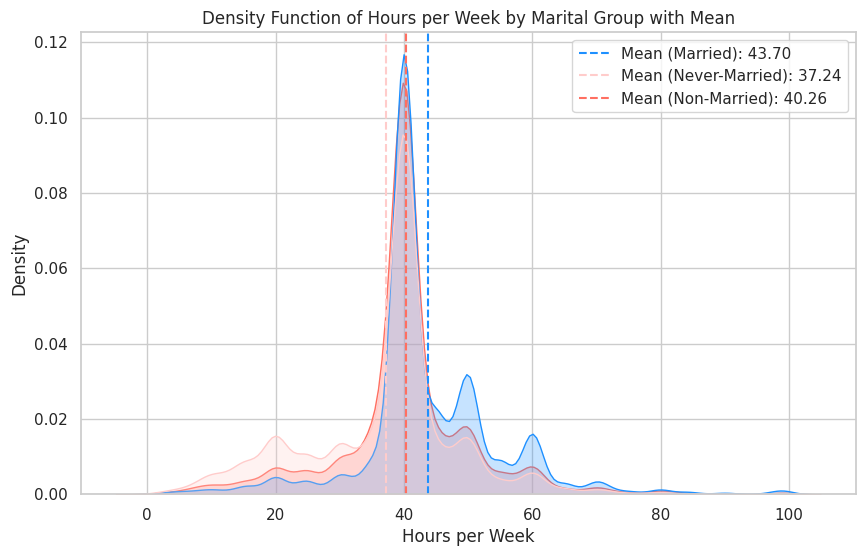

In [53]:
# Set the style for the plots
sns.set(style="whitegrid")

# Custom colors
female_color = '#FF6F61'
male_color = '#1E90FF'

# Map the marital status to a broader category
df['marital_group'] = df['marital_status'].apply(lambda x: 'Married' if 'Married' in x else 'Never-Married' if 'Never-married' in x else 'Non-Married')

# Create a KDE plot
plt.figure(figsize=(10, 6))
sns.kdeplot(x='hours_per_week', hue='marital_group', data=df, fill=True, common_norm=False,
            palette={'Married': male_color, 'Never-Married': '#ffcccb', 'Non-Married': female_color})

# Calculate and plot the mean for each group
mean_hours_per_week = df.groupby('marital_group')['hours_per_week'].mean()
for group, color in zip(mean_hours_per_week.index, [male_color, '#ffcccb', female_color]):
    plt.axvline(x=mean_hours_per_week[group], color=color, linestyle='--', label=f'Mean ({group}): {mean_hours_per_week[group]:.2f}')

# Customize the plot
plt.title('Density Function of Hours per Week by Marital Group with Mean')
plt.xlabel('Hours per Week')
plt.ylabel('Density')
plt.legend()



# Show the plot
plt.show()

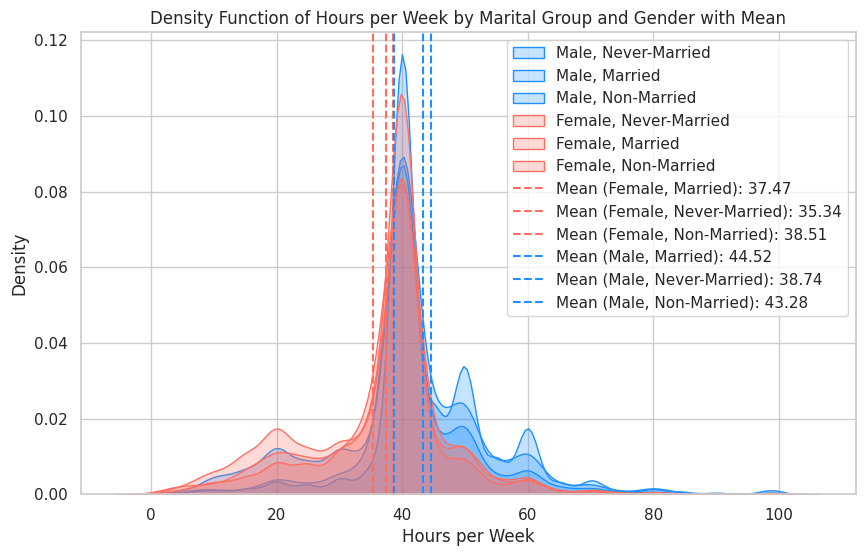

In [54]:

# Set the style for the plots
sns.set(style="whitegrid")

# Custom colors
female_color = '#FF6F61'
male_color = '#1E90FF'

# Map the marital status to a broader category
df['marital_group'] = df['marital_status'].apply(lambda x: 'Married' if 'Married' in x else 'Never-Married' if 'Never-married' in x else 'Non-Married')

# Create separate KDE plots for each combination of gender and marital status
plt.figure(figsize=(10, 6))
for gender in df['sex'].unique():
    for marital_group in df['marital_group'].unique():
        subset = df[(df['sex'] == gender) & (df['marital_group'] == marital_group)]
        sns.kdeplot(x='hours_per_week', data=subset, fill=True, common_norm=False,
                    label=f'{gender}, {marital_group}', color=male_color if gender == 'Male' else female_color)

# Calculate and plot the mean for each group
mean_hours_per_week = df.groupby(['sex', 'marital_group'])['hours_per_week'].mean().reset_index()
for row in mean_hours_per_week.itertuples():
    color = male_color if row.sex == 'Male' else female_color
    plt.axvline(x=row.hours_per_week, color=color, linestyle='--', label=f'Mean ({row.sex}, {row.marital_group}): {row.hours_per_week:.2f}')

# Customize the plot
plt.title('Density Function of Hours per Week by Marital Group and Gender with Mean')
plt.xlabel('Hours per Week')
plt.ylabel('Density')
plt.legend()



# Show the plot
plt.show()

## Female dependency

      sex  marital_group  percentage
0  Female        Married   42.653183
1  Female  Never-Married    3.780148
2  Female    Non-Married    6.122988
3    Male        Married   44.798434
4    Male  Never-Married    5.670484
5    Male    Non-Married   16.704701


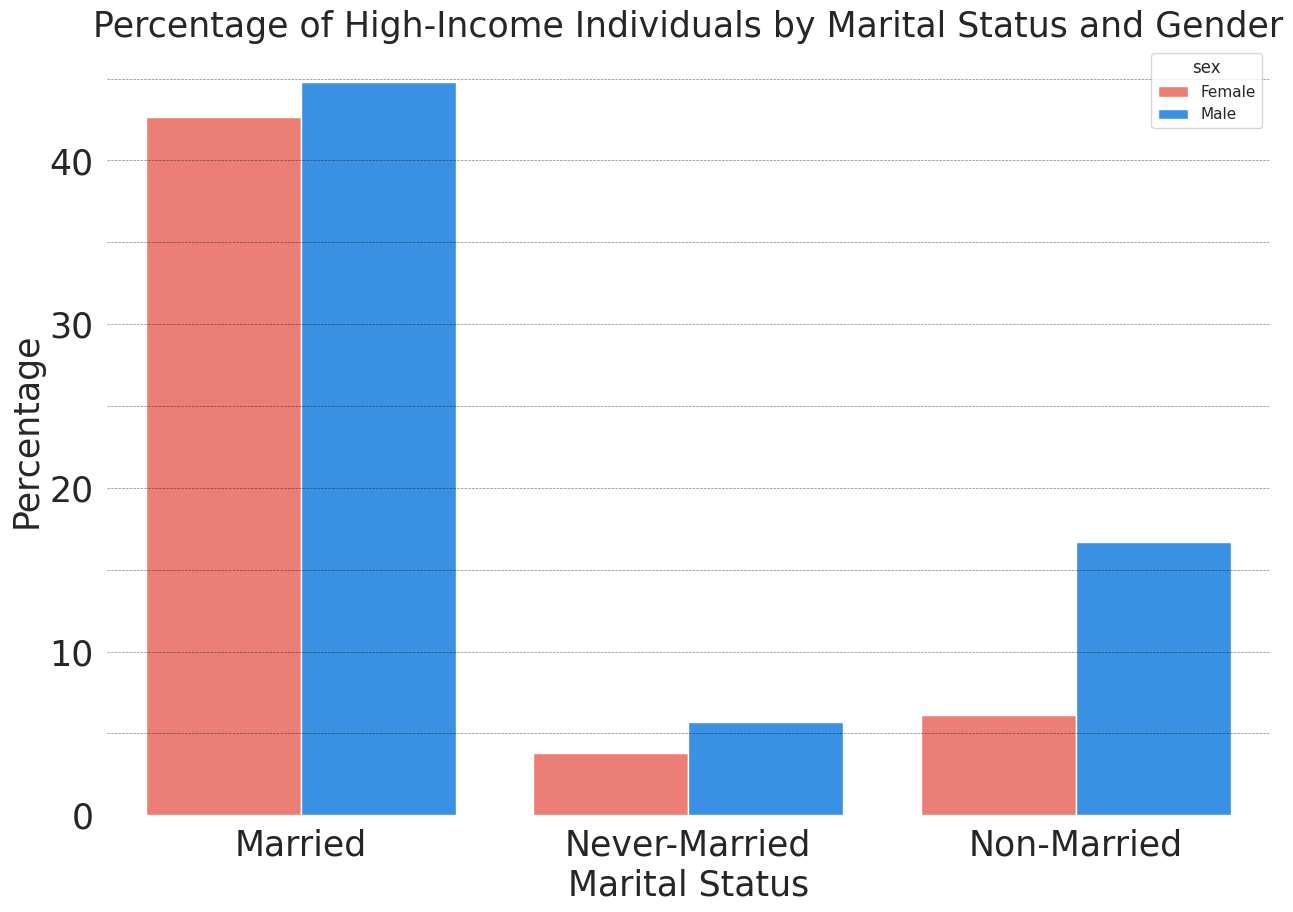

In [55]:
# Custom colors
female_color = '#FF6F61'
male_color = '#1E90FF'

# Map the marital status to three classes: 'Married', 'Never-Married', and 'Non-Married'
df['marital_group'] = df['marital_status'].apply(lambda x: 'Married' if 'Married' in x else 'Never-Married' if 'Never-married' in x else 'Non-Married')

# Calculate the percentage of high-income individuals by gender and marital status
percentage_high_income = df[df['income'] == '>50K'].groupby(['sex', 'marital_group']).size() / df.groupby(['sex', 'marital_group']).size() * 100

# Reset the index to make it easier to work with
percentage_high_income = percentage_high_income.reset_index(name='percentage')
print(percentage_high_income)
# Set the style for the plots
sns.set(style="white")

# Create a stacked bar plot
plt.figure(figsize=(15, 10))
sns.barplot(x='marital_group', y='percentage', hue='sex', data=percentage_high_income, palette={'Male': male_color, 'Female': female_color})
plt.title('Percentage of High-Income Individuals by Marital Status and Gender', fontsize=25)
plt.xlabel('Marital Status', fontsize=25)
plt.ylabel('Percentage', fontsize=25)
plt.yticks(fontsize=25)
plt.xticks(fontsize=25)
plt.box(False)

for edu_num in range(5,50,5):
    plt.axhline(y=edu_num, color='black', linestyle='--', linewidth=0.5, alpha=0.5)

# Save the plot as a PNG image with a transparent background
plt.savefig('high_income_by_maritalgroup_and_gender.png', transparent=True, bbox_inches='tight')

plt.show()

**Note:** The gap for the "Never-Married" group decreases with age, whereas it expands for the "Non-Married" category. A slight difference in working hours was observed earlier.

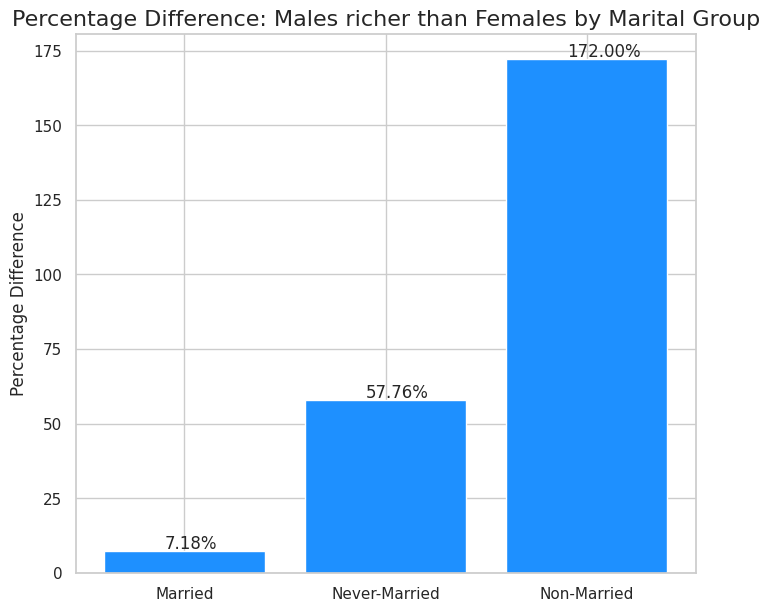

In [62]:
# Data
categories = ['Married', 'Never-Married', 'Non-Married']
percentages = [7.18, 57.76, 172]

# Create a bar plot with male_color for the bars
plt.figure(figsize=(8, 7))
bars = plt.bar(categories, percentages, color=male_color, alpha=1)  # Set the same color for all bars

# Add annotations to the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 1, f"{percentage:.2f}%", fontsize=12)

# Customize the plot
plt.title('Percentage Difference: Males richer than Females by Marital Group', fontsize=16)
plt.ylabel('Percentage Difference', fontsize=12)

# Save the plot as a PNG image with a transparent background
plt.savefig('marital_dependency.png', transparent=True, bbox_inches='tight')

# Show the plot
plt.show()


When working the same number of hours, females consistently earn less than males. While this example focuses on 40-hour workweeks, analysis across all hour ranges reveals a similar pattern: males generally have higher incomes.

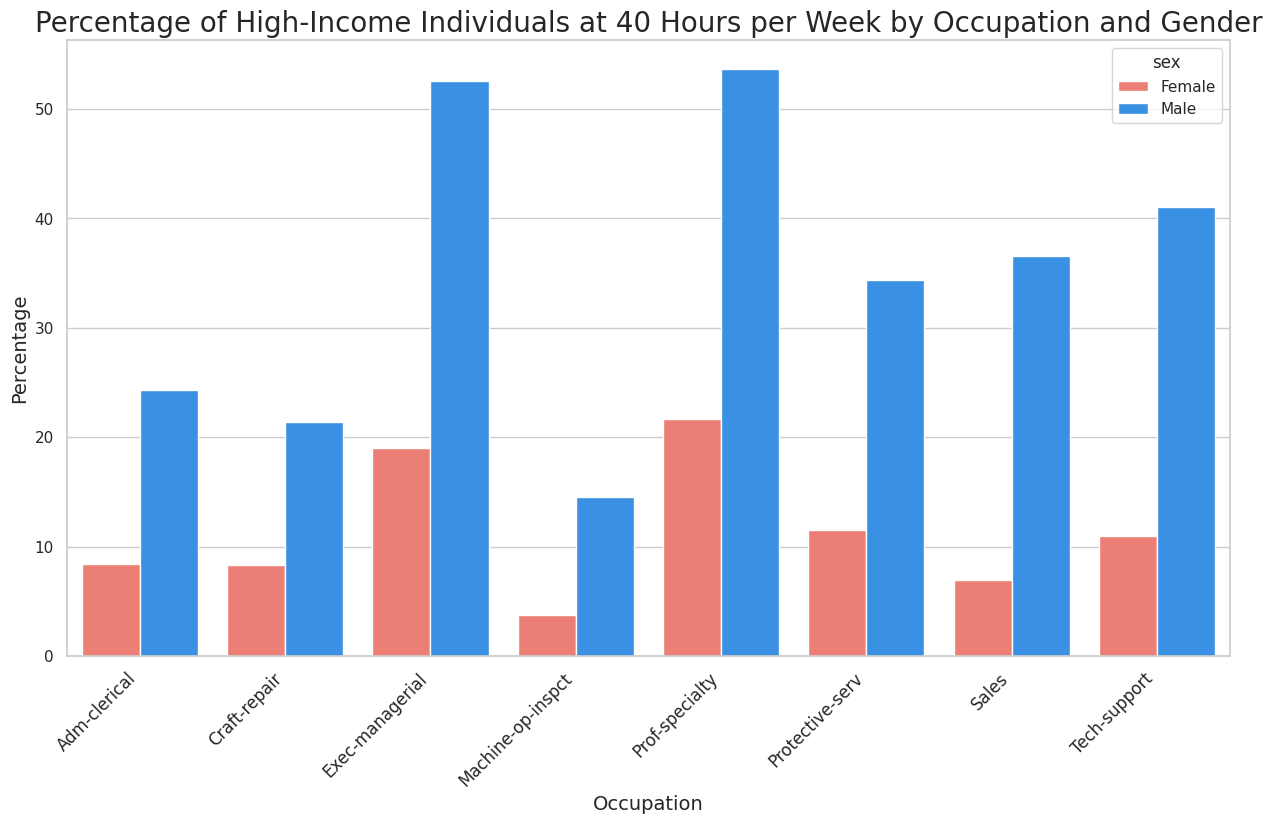

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Custom colors
female_color = '#FF6F61'
male_color = '#1E90FF'

# Filter the population by hours_per_week == 40
df_filtered = df[df['hours_per_week'] == 40]

# Calculate the percentage of high-income individuals by gender and occupation
percentage_high_income_filtered = df_filtered[df_filtered['income'] == '>50K'].groupby(['occupation', 'sex']).size() / df_filtered.groupby(['occupation', 'sex']).size() * 100

# Reset the index to make it easier to work with
percentage_high_income_filtered = percentage_high_income_filtered.reset_index(name='percentage')

# Remove specific occupations
occupations_to_remove = ['Armed-Forces', 'Farming-fishing', 'Other-service', 'Handlers-cleaners', 'Transport-moving', 'Priv-house-serv']
percentage_high_income_filtered = percentage_high_income_filtered[~percentage_high_income_filtered['occupation'].isin(occupations_to_remove)]

# Set the style for the plots
sns.set(style="whitegrid")

# Create a bar plot with custom colors for Male and Female
plt.figure(figsize=(15, 8))
sns.barplot(x='occupation', y='percentage', hue='sex', data=percentage_high_income_filtered,
            palette={'Male': male_color, 'Female': female_color})

# Add title and labels
plt.title('Percentage of High-Income Individuals at 40 Hours per Week by Occupation and Gender', fontsize=20)
plt.xlabel('Occupation', fontsize=14)
plt.ylabel('Percentage', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', fontsize=12)

# Save the plot as a PNG image with a transparent background
plt.savefig('percentage_high_income_working40h_by_gender_filtered_with_colors.png', transparent=True, bbox_inches='tight')

# Show the plot
plt.show()


## Percentage high-income by continent

When working 40 hours:

       continent     sex  percentage
0           Asia  Female   16.949153
1           Asia    Male   35.820896
2         Europe  Female   17.073171
3         Europe    Male   32.142857
4  North America  Female   10.268670
5  North America    Male   27.381870
6  South America  Female    2.316602
7  South America    Male    9.010601


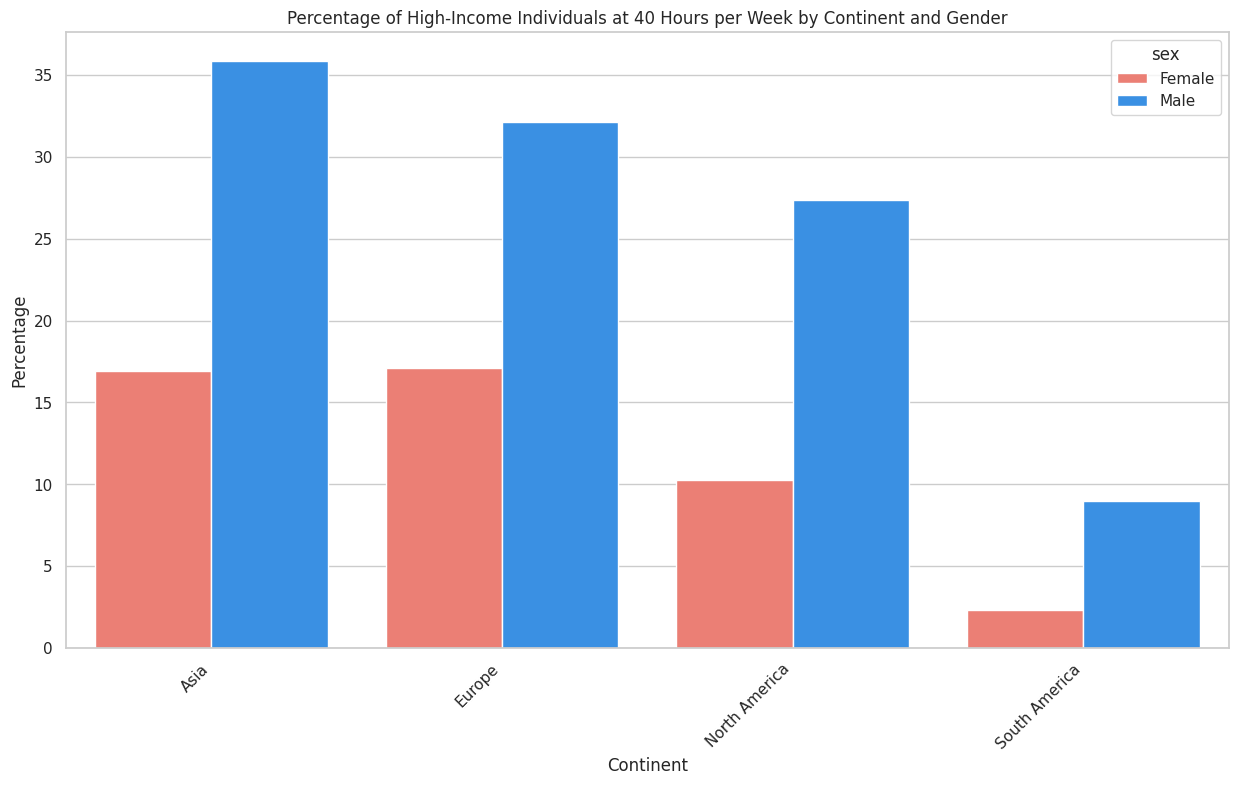

In [59]:
# Custom colors
female_color = '#FF6F61'
male_color = '#1E90FF'

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
column_names = [
    "age", "workclass", "fnlwgt", "education", "education_num", "marital_status",
    "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss",
    "hours_per_week", "native_country", "income"
]
df = pd.read_csv(url, names=column_names, sep=",\s*", engine="python", na_values='?')

# Mapping of countries to continents
country_to_continent = {
    'United-States': 'North America',
    'Mexico': 'South America',
    'Canada': 'North America',
    'Puerto-Rico': 'South America',
    'El-Salvador': 'South America',
    'Cuba': 'South America',
    'Jamaica': 'South America',
    'South': 'South America',
    'Dominican-Republic': 'South America',
    'Guatemala': 'South America',
    'Outlying-US(Guam-USVI-etc)': 'North America',
    'Honduras': 'South America',
    'Trinadad&Tobago': 'South America',
    'Columbia': 'South America',
    'Ecuador': 'South America',
    'Peru': 'South America',
    'Nicaragua': 'South America',
    'Haiti': 'South America',
    'Portugal': 'Europe',
    'Cambodia': 'Asia',
    'Thailand': 'Asia',
    'Laos': 'Asia',
    'Taiwan': 'Asia',
    'Hong': 'Asia',
    'Vietnam': 'Asia',
    'China': 'Asia',
    'Japan': 'Asia',
    'Iran': 'Asia',
    'India': 'Asia',
    'Philippines': 'Asia',
    'Greece': 'Europe',
    'Italy': 'Europe',
    'Poland': 'Europe',
    'Hungary': 'Europe',
    'Ireland': 'Europe',
    'France': 'Europe',
    'Scotland': 'Europe',
    'Germany': 'Europe',
    'England': 'Europe',
    'Yugoslavia': 'Europe',
    'Holand-Netherlands': 'Europe'
}

for e in range(40, 41):
    # Map native_country to continent
    df['continent'] = df['native_country'].map(country_to_continent)

    # Filter the population by hours_per_week == 40
    df_filtered = df[df['hours_per_week'] == e]

    # Calculate the percentage of high-income individuals by gender and continent
    percentage_high_income_filtered = (
        df_filtered[df_filtered['income'] == '>50K']
        .groupby(['continent', 'sex']).size()
        / df_filtered.groupby(['continent', 'sex']).size()
        * 100
    )

    # Reset the index to make it easier to work with
    percentage_high_income_filtered = percentage_high_income_filtered.reset_index(name='percentage')
    print(percentage_high_income_filtered)

    # Apply a clean style for the plot
    sns.set(style="whitegrid")

    # Create a bar plot with custom colors
    plt.figure(figsize=(15, 8))
    sns.barplot(
        x='continent',
        y='percentage',
        hue='sex',
        data=percentage_high_income_filtered,
        palette={'Male': male_color, 'Female': female_color}
    )
    plt.title('Percentage of High-Income Individuals at 40 Hours per Week by Continent and Gender')
    plt.xlabel('Continent')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

    # Show the plot
    plt.show()


In general:

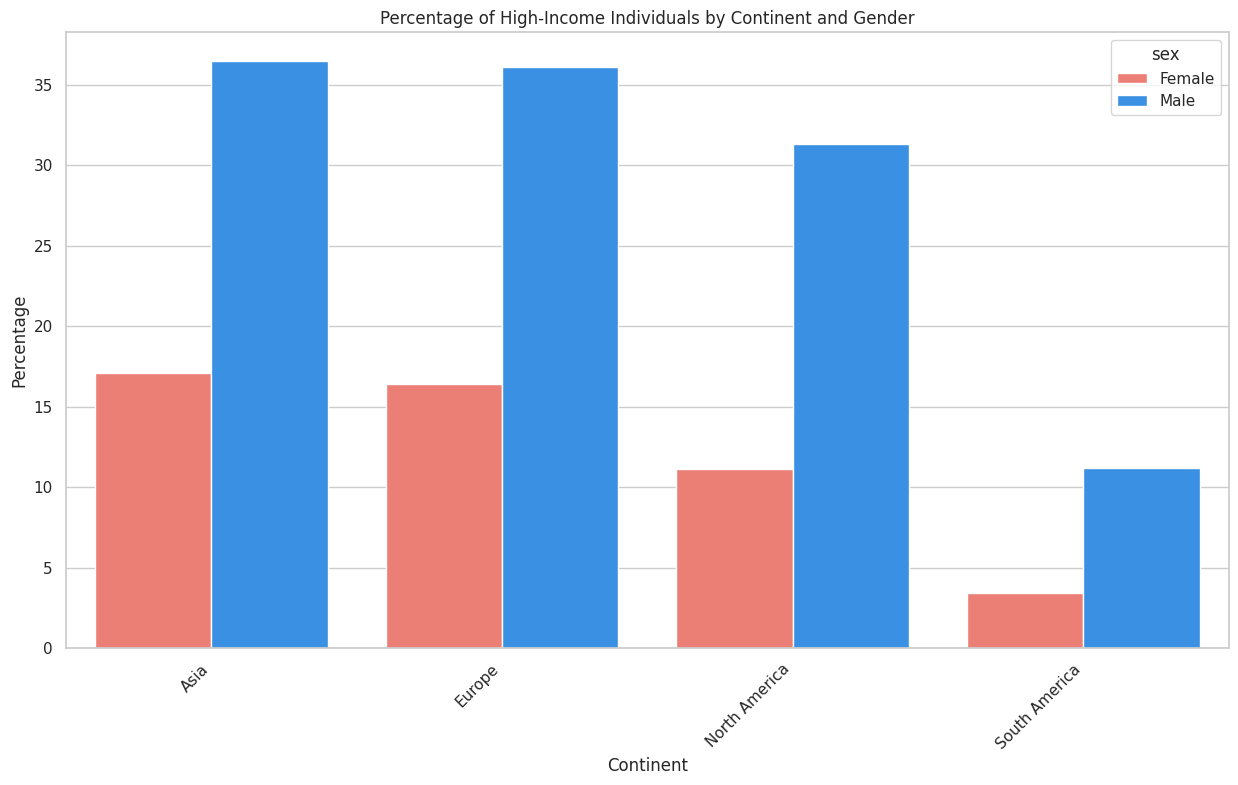

In [60]:
# Map native_country to continent
df['continent'] = df['native_country'].map(country_to_continent)

# Calculate the percentage of high-income individuals by gender and continent
percentage_high_income = (
    df[df['income'] == '>50K']
    .groupby(['continent', 'sex']).size()
    / df.groupby(['continent', 'sex']).size()
    * 100
)

# Reset the index to make it easier to work with
percentage_high_income = percentage_high_income.reset_index(name='percentage')

# Apply a clean style for the plot
sns.set(style="whitegrid")

# Create a bar plot with custom colors
plt.figure(figsize=(15, 8))
sns.barplot(
    x='continent',
    y='percentage',
    hue='sex',
    data=percentage_high_income,
    palette={'Male': male_color, 'Female': female_color}  # Using custom colors
)
plt.title('Percentage of High-Income Individuals by Continent and Gender')
plt.xlabel('Continent')
plt.ylabel('Percentage')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()


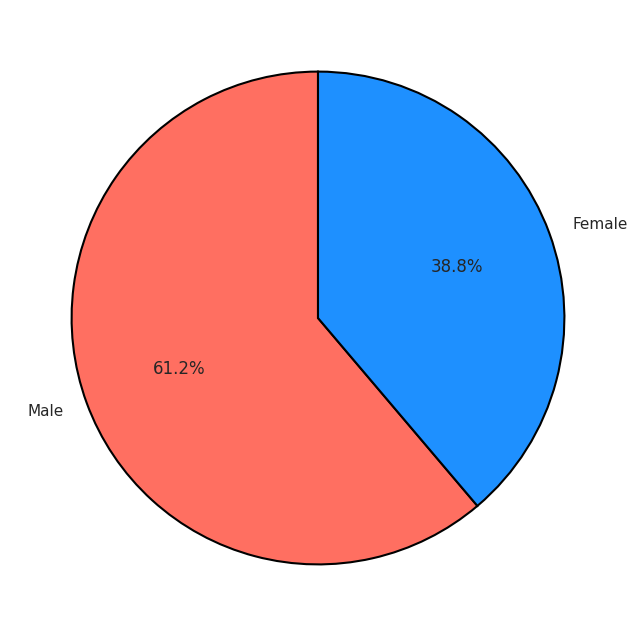

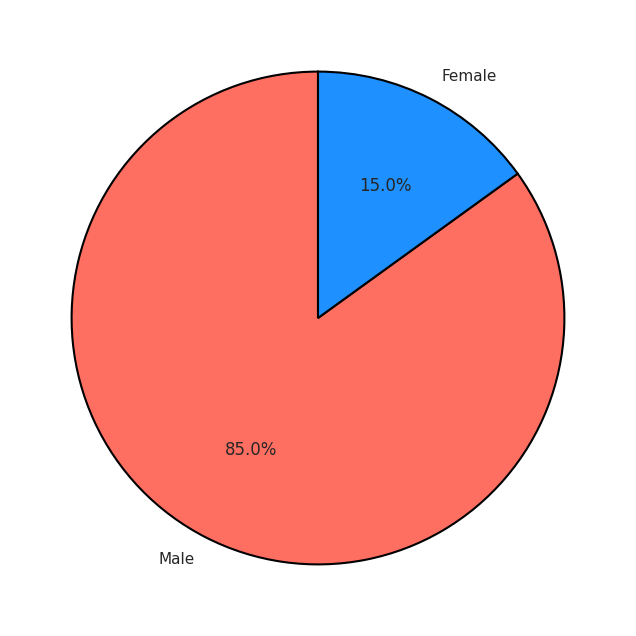

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter the dataset for individuals with income >50K and <=50K
df_high_income = df[df['income'] == '>50K']
df_low_income = df[df['income'] == '<=50K']

# Count the number of males and females with >50K income and <=50K income
high_income_gender_distribution = df_high_income['sex'].value_counts()
low_income_gender_distribution = df_low_income['sex'].value_counts()

# Define custom colors for Male and Female
female_color = '#FF6F61'
male_color = '#1E90FF'

# Create the first pie chart for low-income individuals (<=50K)
plt.figure(figsize=(8, 8))
plt.pie(low_income_gender_distribution,
        labels=low_income_gender_distribution.index,
        autopct='%1.1f%%',
        colors=[female_color, male_color],
        startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'linestyle': 'solid'})


# Show the first pie chart
plt.show()

# Create the second pie chart for high-income individuals (>50K)
plt.figure(figsize=(8, 8))
plt.pie(high_income_gender_distribution,
        labels=high_income_gender_distribution.index,
        autopct='%1.1f%%',
        colors=[female_color, male_color],
        startangle=90,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1.5, 'linestyle': 'solid'})


# Show the second pie chart
plt.show()




South America shows the largest gender pay disparity, with males earning significantly more than females. Men in South America are 227.81% wealthier than women, compared to 181.73% in North America, 120.18% in Europe, and 113.28% in Asia.

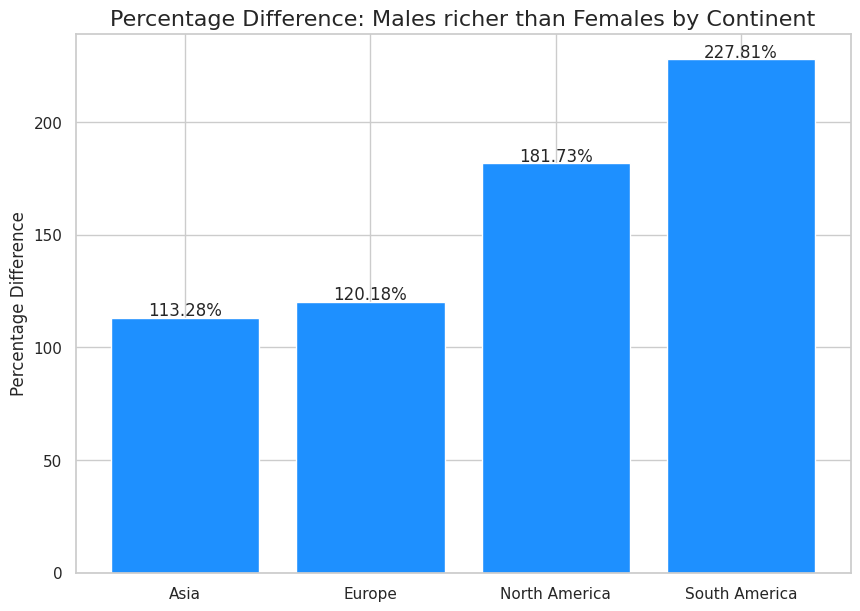

In [63]:
# Data
continents = ['Asia', 'Europe', 'North America', 'South America']
percentages = [113.28, 120.18, 181.73, 227.81]

# Create a bar plot with male_color for all bars
plt.figure(figsize=(10, 7))
bars = plt.bar(continents, percentages, color=male_color, alpha=1)  # Set the same color for all bars

# Add annotations to the bars
for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.2, bar.get_height() + 1, f"{percentage:.2f}%", fontsize=12)

# Customize the plot
plt.title('Percentage Difference: Males richer than Females by Continent', fontsize=16)
plt.ylabel('Percentage Difference', fontsize=12)

# Save the plot as a PNG image with a transparent background
plt.savefig('continent_dependency.png', transparent=True, bbox_inches='tight')

# Show the plot
plt.show()


Perecentage of high-income by continent

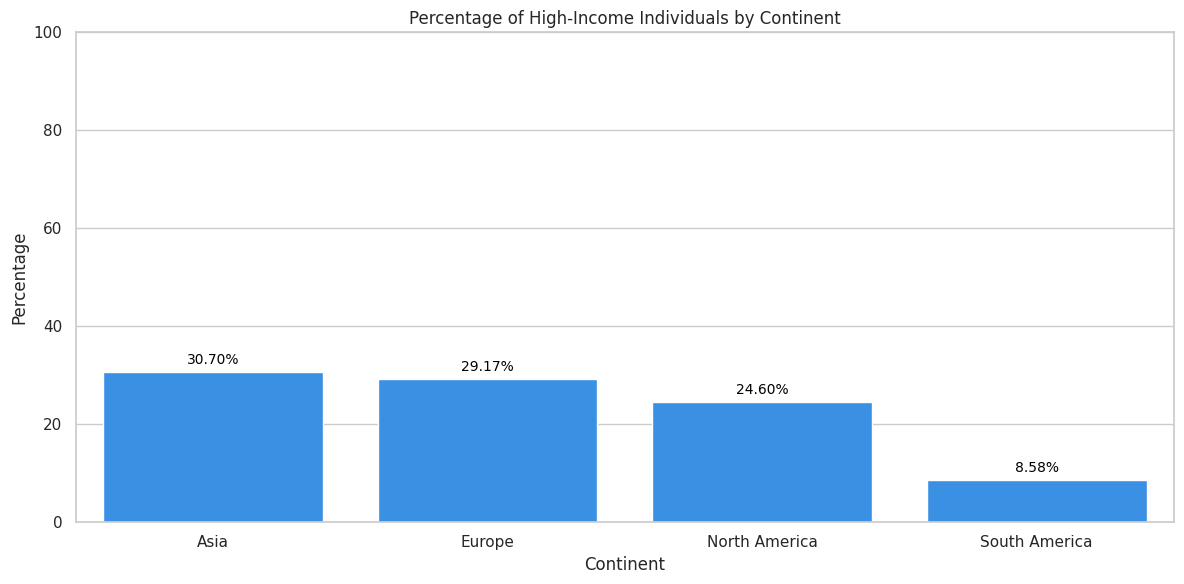

In [64]:
# Map native_country to continent
df['continent'] = df['native_country'].map(country_to_continent)

# Calculate the percentage of high-income individuals for each continent
percentage_high_income_by_continent = (
    df[df['income'] == '>50K']
    .groupby('continent').size()
    / df.groupby('continent').size() * 100
)

# Convert the result to a DataFrame for easier handling
percentage_high_income_by_continent = percentage_high_income_by_continent.reset_index(name='percentage')

# Apply a clean and consistent style for the plot
sns.set(style="whitegrid")

# Create a bar plot with a custom color
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(
    x='continent',
    y='percentage',
    data=percentage_high_income_by_continent,
    color=male_color  # Use male_color for all bars
)

# Add percentage labels on top of each bar
for index, row in percentage_high_income_by_continent.iterrows():
    plt.text(
        index,
        row['percentage'] + 1,
        f'{row["percentage"]:.2f}%',
        ha='center',
        va='bottom',
        color='black',
        fontsize=10
    )

# Customize the plot with titles and axis labels
plt.title('Percentage of High-Income Individuals by Continent')
plt.xlabel('Continent')
plt.ylabel('Percentage')
plt.ylim(0, 100)  # Set the y-axis limit from 0 to 100

# Save the plot as a PNG image with a transparent background
plt.savefig('percentage_high_income_by_continent.png', transparent=True, bbox_inches='tight')

# Ensure elements are properly displayed and show the plot
plt.tight_layout()
plt.show()


There is no significant difference in hours working by continent:

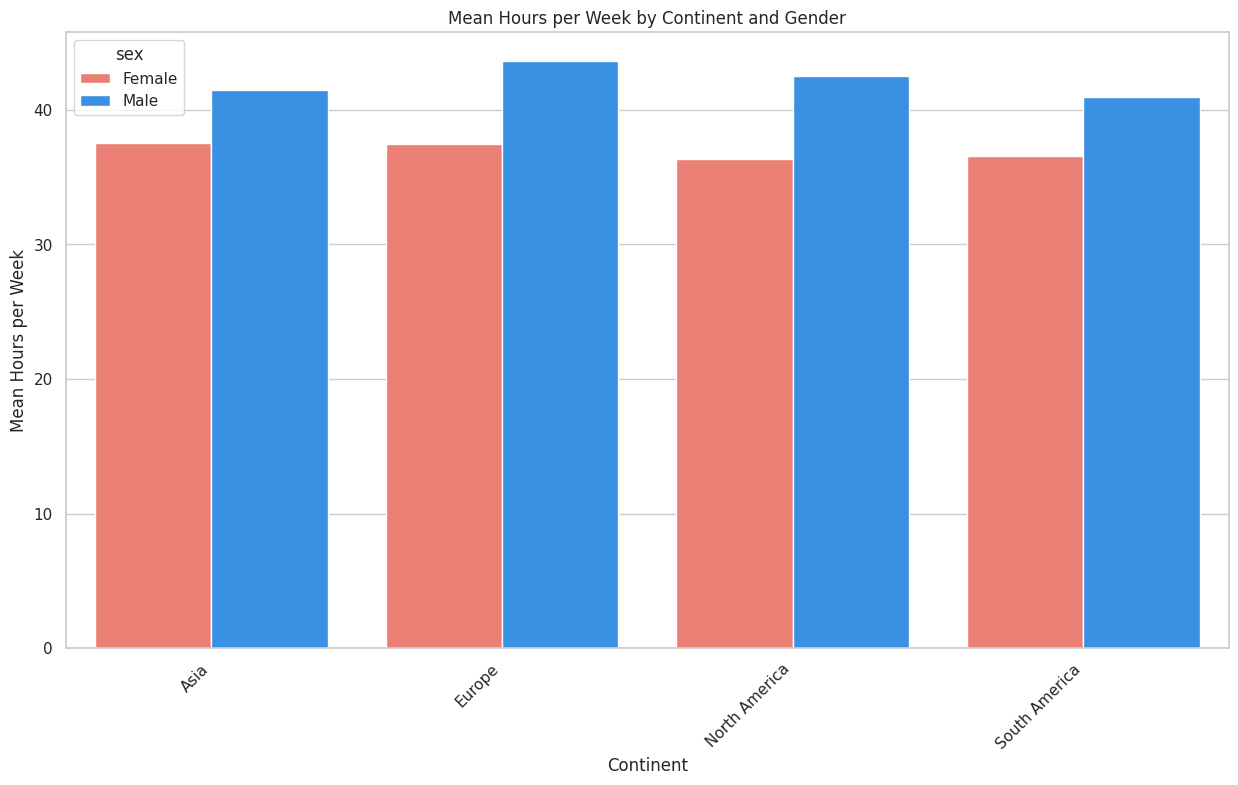

In [61]:
# Map native_country to continent
df['continent'] = df['native_country'].map(country_to_continent)

# Calculate the mean of hours_per_week by continent and sex
mean_hours_per_week = df.groupby(['continent', 'sex'])['hours_per_week'].mean().reset_index()

# Apply a clean style for the plot
sns.set(style="whitegrid")

# Create a bar plot with custom colors
plt.figure(figsize=(15, 8))
sns.barplot(
    x='continent',
    y='hours_per_week',
    hue='sex',
    data=mean_hours_per_week,
    palette={'Male': male_color, 'Female': female_color}  # Using custom colors
)
plt.title('Mean Hours per Week by Continent and Gender')
plt.xlabel('Continent')
plt.ylabel('Mean Hours per Week')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()
